In [1]:
import numpy as np
import argparse
import numpy as np

In [5]:
path = r'F:\ERA5_pressure_level\traj_clusters\1979_2019_02_P10\DELPCT'
data = np.loadtxt(path, usecols=(0,1,2))
ks = data[:, 1].astype(int) 
delpct = data[:, 2] 
diffs = np.diff(delpct)

In [6]:
diffs

array([-1.74, -0.96, -1.34, ..., -0.76,  6.25, 41.04])

In [2]:
import numpy as np
from kneed import KneeLocator
def find_elbow_by_line(ks, pct):
    x1, y1 = ks[0], pct[0]
    x2, y2 = ks[-1], pct[-1]
    ks = np.array(ks)
    pct = np.array(pct)
    
    # 计算所有点到线段的垂直距离
    numerator = np.abs((y2 - y1)*ks - (x2 - x1)*pct + x2*y1 - y2*x1)
    denom = np.hypot(y2 - y1, x2 - x1)
    distances = numerator / denom
    
    idx = np.argmax(distances)
    return int(ks[idx]), distances, idx



In [17]:
path = r'F:\ERA5_pressure_level\traj_clusters\1979_2019_07_P10\DELPCT'
data = np.loadtxt(path, usecols=(0,1,2))
ks = data[:, 1].astype(int) 
delpct = data[:, 2]
mask = (ks >= 1) & (ks <= 15)
ks_small = ks[mask]
delpct_small = delpct[mask]
order = np.argsort(ks_small)
ks_small = ks_small[order]
delpct_small = delpct_small[order]

# --- 3. 使用 kneed 自动寻找 “肘部” ---
kl = KneeLocator(
    ks_small, delpct_small,
    curve="convex",
    direction="decreasing",
    S=1.0,
    online=True
)
best_k = kl.knee  # 或 kl.elbow
print(f"✅ 自动识别之最佳聚类数 K = {best_k}")


✅ 自动识别之最佳聚类数 K = 5


In [13]:
delpct_small

array([57.31, 46.26, 15.92, 16.55, 15.6 , 10.55, 11.33,  6.79,  4.84,
        4.76,  4.81,  4.11,  3.89,  3.08,  3.01])

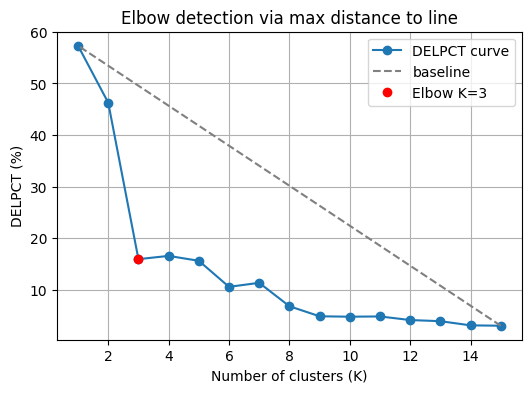

In [10]:
# 可视化结果
plt.figure(figsize=(6,4))
plt.plot(ks_small, delpct_small, 'o-', label='DELPCT curve')
plt.plot([ks_small[0], ks_small[-1]], [delpct_small[0], delpct_small[-1]], '--', color='gray', label='baseline')
plt.plot(ks_small[idx], delpct_small[idx], 'ro', label=f'Elbow K={best_k}')
plt.xlabel('Number of clusters (K)')
plt.ylabel('DELPCT (%)')
plt.title('Elbow detection via max distance to line')
plt.legend()
plt.grid(True)
plt.show()